## ASBD LAB 4 - CED19I027 - N. SREE DHYUTI

In [53]:
# CED19I027 - N. SREE DHYUTI - ASBD LAB4

# Import Required Libraries
import pandas as pd
import math
import random
import statistics
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import openpyxl
from openpyxl.styles import PatternFill
import squarify
import stemgraphic
import plotly.graph_objects as go  
import plotly.express as px
import scipy.stats as stats

## Q1. Suppose that the data for analysis includes the attribute age. The age values for the data tuples are (in increasing order) 13, 15, 16, 16, 19, 20, 20, 21, 22, 22, 25, 25, 25, 25, 30, 33, 33, 35, 35, 35, 35, 36, 40, 45, 46, 52, 70.

- Use min-max normalization to transform the values of age to the range[0:1]
- Use z-score normalization to transform the values of age.
- Use normalization by decimal scaling to transform the values of age such that the transformed value is less than 1.

**Min - Max Normalization**

In [54]:
ages = [13, 15, 16, 16, 19, 20, 20, 21, 22, 22, 25, 25, 25, 25, 30, 33, 33, 35, 35, 35, 35, 36, 40, 45, 46, 52, 70]

max_age = max(ages)
min_age = min(ages)

# Min Max Normalization

min_max = []

for i in range(len(ages)):
    min_max.append((ages[i] - min_age)/(max_age-min_age))

print("(a) Min-Max Normalization:\n")
print(min_max)


(a) Min-Max Normalization:

[0.0, 0.03508771929824561, 0.05263157894736842, 0.05263157894736842, 0.10526315789473684, 0.12280701754385964, 0.12280701754385964, 0.14035087719298245, 0.15789473684210525, 0.15789473684210525, 0.21052631578947367, 0.21052631578947367, 0.21052631578947367, 0.21052631578947367, 0.2982456140350877, 0.3508771929824561, 0.3508771929824561, 0.38596491228070173, 0.38596491228070173, 0.38596491228070173, 0.38596491228070173, 0.40350877192982454, 0.47368421052631576, 0.5614035087719298, 0.5789473684210527, 0.6842105263157895, 1.0]


**Z-Score Normalization**

In [55]:
# Z-Score Normalization
z_scores=[]
stdev = statistics.stdev(ages)
mean = statistics.mean(ages)
for i in range(len(ages)):
    z_scores.append((ages[i]-mean)/stdev)

print("\n(b) Z-Score Normalization:\n")
print("User-Defined")
print(z_scores)

data = np.array(ages)
print("\n Using Scipy:")
print(stats.zscore(data))


(b) Z-Score Normalization:

User-Defined
[-1.3106784379762693, -1.1561442990009012, -1.0788772295132172, -1.0788772295132172, -0.8470760210501652, -0.7698089515624812, -0.7698089515624812, -0.6925418820747972, -0.6152748125871133, -0.6152748125871133, -0.38347360412406123, -0.38347360412406123, -0.38347360412406123, -0.38347360412406123, 0.0028617433143587477, 0.23466295177741073, 0.23466295177741073, 0.3891970907527787, 0.3891970907527787, 0.3891970907527787, 0.3891970907527787, 0.4664641602404627, 0.7755324381911987, 1.1618677856296187, 1.2391348551173027, 1.7027372720434066, 3.0935445228217184]

 Using Scipy:
[-1.33564599e+00 -1.17816807e+00 -1.09942912e+00 -1.09942912e+00
 -8.63212252e-01 -7.84473297e-01 -7.84473297e-01 -7.05734341e-01
 -6.26995386e-01 -6.26995386e-01 -3.90778520e-01 -3.90778520e-01
 -3.90778520e-01 -3.90778520e-01  2.91625761e-03  2.39133124e-01
  2.39133124e-01  3.96611035e-01  3.96611035e-01  3.96611035e-01
  3.96611035e-01  4.75349990e-01  7.90305812e-01  1.18

**Decimal Scaling**

In [56]:
decimal_scale = []

def decNor(num,maxNum):
    digit=len(str(maxNum))
    div=pow(10,digit)
    return num/div

for i in range(len(ages)):
    decimal_scale.append(decNor(ages[i], max_age))
    
print("Decimal Normalization:\n")
print(decimal_scale)

Decimal Normalization:

[0.13, 0.15, 0.16, 0.16, 0.19, 0.2, 0.2, 0.21, 0.22, 0.22, 0.25, 0.25, 0.25, 0.25, 0.3, 0.33, 0.33, 0.35, 0.35, 0.35, 0.35, 0.36, 0.4, 0.45, 0.46, 0.52, 0.7]


## Q2. Use the given dataset and perform the operations listed below.
**Dataset Description**
**Attributes in the dataset:**
-  Date - The date of the observation
- Average Price - the average price of a single avocado
- type - conventional or organic
- year - the year
- Region - the city or region of the observation
- Total Volume - Total number of avocados sold
- 4046 - Total number of avocados with PLU* 4046 sold
- 4225 - Total number of avocados with PLU* 4225 sold
- 4770 - Total number of avocados with PLU* 4770 sold



**Load the data**

In [57]:
data = pd.read_csv(r"Avocado Dataset.csv")
data

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,29-11-2015,1.29,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18245,28-01-2018,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,21-01-2018,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,14-01-2018,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,07-01-2018,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


**(a) Sort the attribute “Total Volume” in the given dataset and distribute the data into equal sized/frequency bins. Let the number of bins be 250. Smooth the sorted data by (i)bin-means (ii) bin-medians (iii) bin-boundaries**

In [58]:
sorted_data = data.sort_values(by=["Total Volume"])
sorted_data

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
10381,08-11-2015,1.59,84.56,3.95,3.95,0.00,76.66,73.33,3.33,0.00,organic,2015,MiamiFtLauderdale
9437,04-01-2015,1.73,379.82,0.00,59.82,0.00,320.00,320.00,0.00,0.00,organic,2015,BuffaloRochester
13189,30-10-2016,1.58,385.55,8.13,47.42,0.00,330.00,330.00,0.00,0.00,organic,2016,MiamiFtLauderdale
11698,12-07-2015,2.05,419.98,0.00,63.42,0.00,356.56,356.56,0.00,0.00,organic,2015,Syracuse
13193,02-10-2016,1.49,472.82,10.50,18.99,0.00,443.33,440.00,3.33,0.00,organic,2016,MiamiFtLauderdale
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5493,08-05-2016,0.82,46324529.70,14223304.98,17896391.60,1993645.36,12211187.76,8747756.84,3342780.83,120650.09,conventional,2016,TotalUS
8353,07-05-2017,1.09,47293921.60,17076650.82,13549102.59,863471.88,15804696.31,11228049.63,4324231.19,252415.49,conventional,2017,TotalUS
5506,07-02-2016,0.76,52288697.89,16573573.78,20470572.61,2546439.11,12698112.39,9083373.04,3373077.87,241661.48,conventional,2016,TotalUS
8366,05-02-2017,0.77,61034457.10,22743616.17,20328161.55,1664383.09,16298296.29,12567155.58,3618270.75,112869.96,conventional,2017,TotalUS


**(a) Bin Means**

In [59]:
num_bins = 250
bin_size = math.ceil(sorted_data.shape[0]/num_bins)
bins = []
binn = []
for i in sorted_data.index:  
    binn.append(int(sorted_data["Total Volume"][i]))
    if(len(binn) == bin_size):
        bins.append(binn)
        binn = []

cnt = 0
for i in sorted_data.index:
    bin_mean = statistics.mean(bins[cnt//bin_size])
    cnt += 1
    sorted_data.at[i,'Total Volume'] = bin_mean

print("Data after sorting with bin-means")
sorted_data

Data after sorting with bin-means


,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
10381,08-11-2015,1.59,7.351781e+02,3.95,3.95,0.00,76.66,73.33,3.33,0.00,organic,2015,MiamiFtLauderdale
9437,04-01-2015,1.73,7.351781e+02,0.00,59.82,0.00,320.00,320.00,0.00,0.00,organic,2015,BuffaloRochester
13189,30-10-2016,1.58,7.351781e+02,8.13,47.42,0.00,330.00,330.00,0.00,0.00,organic,2016,MiamiFtLauderdale
11698,12-07-2015,2.05,7.351781e+02,0.00,63.42,0.00,356.56,356.56,0.00,0.00,organic,2015,Syracuse
13193,02-10-2016,1.49,7.351781e+02,10.50,18.99,0.00,443.33,440.00,3.33,0.00,organic,2016,MiamiFtLauderdale
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5493,08-05-2016,0.82,3.897352e+07,14223304.98,17896391.60,1993645.36,12211187.76,8747756.84,3342780.83,120650.09,conventional,2016,TotalUS
8353,07-05-2017,1.09,3.897352e+07,17076650.82,13549102.59,863471.88,15804696.31,11228049.63,4324231.19,252415.49,conventional,2017,TotalUS
5506,07-02-2016,0.76,3.897352e+07,16573573.78,20470572.61,2546439.11,12698112.39,9083373.04,3373077.87,241661.48,conventional,2016,TotalUS
8366,05-02-2017,0.77,3.897352e+07,22743616.17,20328161.55,1664383.09,16298296.29,12567155.58,3618270.75,112869.96,conventional,2017,TotalUS


**(b) Bin Median**

In [60]:
# Bin - Median

sorted_data1 = data.sort_values(by=["Total Volume"])
bins = []
binn = []
for i in sorted_data1.index:  
    binn.append(int(sorted_data1["Total Volume"][i]))
    if(len(binn) == bin_size):
        bins.append(binn)
        binn = []
cnt = 0
for i in sorted_data1.index:
    bin_mean = statistics.median(bins[cnt//bin_size])
    cnt += 1
    sorted_data1.at[i,'Total Volume'] = bin_mean

print("Data after sorting with bin-median")
sorted_data1

Data after sorting with bin-median


,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
10381,08-11-2015,1.59,774.0,3.95,3.95,0.00,76.66,73.33,3.33,0.00,organic,2015,MiamiFtLauderdale
9437,04-01-2015,1.73,774.0,0.00,59.82,0.00,320.00,320.00,0.00,0.00,organic,2015,BuffaloRochester
13189,30-10-2016,1.58,774.0,8.13,47.42,0.00,330.00,330.00,0.00,0.00,organic,2016,MiamiFtLauderdale
11698,12-07-2015,2.05,774.0,0.00,63.42,0.00,356.56,356.56,0.00,0.00,organic,2015,Syracuse
13193,02-10-2016,1.49,774.0,10.50,18.99,0.00,443.33,440.00,3.33,0.00,organic,2016,MiamiFtLauderdale
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5493,08-05-2016,0.82,37352360.0,14223304.98,17896391.60,1993645.36,12211187.76,8747756.84,3342780.83,120650.09,conventional,2016,TotalUS
8353,07-05-2017,1.09,37352360.0,17076650.82,13549102.59,863471.88,15804696.31,11228049.63,4324231.19,252415.49,conventional,2017,TotalUS
5506,07-02-2016,0.76,37352360.0,16573573.78,20470572.61,2546439.11,12698112.39,9083373.04,3373077.87,241661.48,conventional,2016,TotalUS
8366,05-02-2017,0.77,37352360.0,22743616.17,20328161.55,1664383.09,16298296.29,12567155.58,3618270.75,112869.96,conventional,2017,TotalUS


**(c) Bin Boundaries**

In [61]:
# Bin - boundaries

sorted_data2 = data.sort_values(by=["Total Volume"])
bins = []
binn = []
for i in sorted_data2.index:  
    binn.append(int(sorted_data2["Total Volume"][i]))
    if(len(binn) == bin_size):
        bins.append(binn)
        binn = []
cnt = 0
for i in sorted_data2.index:
    bin_mean = statistics.median(bins[cnt//bin_size])
    bin_bound_left = min(bins[cnt//bin_size])
    bin_bound_right = max(bins[cnt//bin_size])
    cnt += 1
    if(int(sorted_data2["Total Volume"][i]) >= bin_mean):
        sorted_data2.at[i,'Total Volume'] = bin_bound_right
    else:
        sorted_data2.at[i,'Total Volume'] = bin_bound_left
        

print("Data after sorting with bin-boundaries")
sorted_data2

Data after sorting with bin-boundaries


,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
10381,08-11-2015,1.59,84.0,3.95,3.95,0.00,76.66,73.33,3.33,0.00,organic,2015,MiamiFtLauderdale
9437,04-01-2015,1.73,84.0,0.00,59.82,0.00,320.00,320.00,0.00,0.00,organic,2015,BuffaloRochester
13189,30-10-2016,1.58,84.0,8.13,47.42,0.00,330.00,330.00,0.00,0.00,organic,2016,MiamiFtLauderdale
11698,12-07-2015,2.05,84.0,0.00,63.42,0.00,356.56,356.56,0.00,0.00,organic,2015,Syracuse
13193,02-10-2016,1.49,84.0,10.50,18.99,0.00,443.33,440.00,3.33,0.00,organic,2016,MiamiFtLauderdale
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5493,08-05-2016,0.82,62505646.0,14223304.98,17896391.60,1993645.36,12211187.76,8747756.84,3342780.83,120650.09,conventional,2016,TotalUS
8353,07-05-2017,1.09,62505646.0,17076650.82,13549102.59,863471.88,15804696.31,11228049.63,4324231.19,252415.49,conventional,2017,TotalUS
5506,07-02-2016,0.76,62505646.0,16573573.78,20470572.61,2546439.11,12698112.39,9083373.04,3373077.87,241661.48,conventional,2016,TotalUS
8366,05-02-2017,0.77,62505646.0,22743616.17,20328161.55,1664383.09,16298296.29,12567155.58,3618270.75,112869.96,conventional,2017,TotalUS


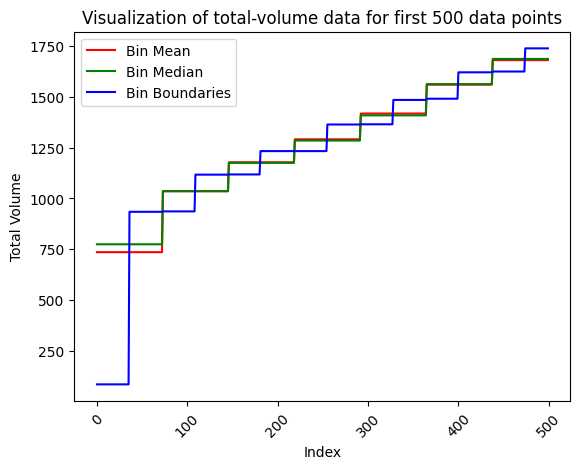

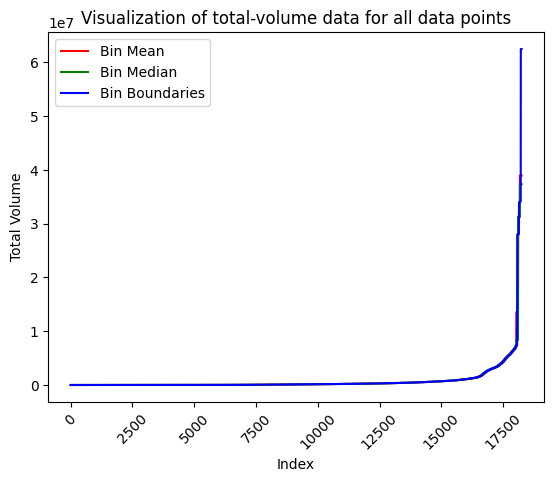

In [62]:
bin_mean_data = list(sorted_data["Total Volume"])
bin_median_data = list(sorted_data1["Total Volume"])
bin_boundaries_data = list(sorted_data2["Total Volume"])


# Plot Graphs
plt.plot(bin_mean_data[:500], color = "red")
plt.plot(bin_median_data[:500], color = "green")
plt.plot(bin_boundaries_data[:500], color = "blue")

# plt.plot(bin_mean_data, color = "red")
# plt.plot(bin_median_data, color = "green")
# plt.plot(bin_boundaries_data, color = "blue")

plt.xlabel("Index")
plt.ylabel("Total Volume")
plt.title(f"Visualization of total-volume data for first 500 data points")
plt.legend(["Bin Mean","Bin Median", "Bin Boundaries"])
plt.xticks(rotation = 45)
plt.show()

plt.plot(bin_mean_data, color = "red")
plt.plot(bin_median_data, color = "green")
plt.plot(bin_boundaries_data, color = "blue")

plt.xlabel("Index")
plt.ylabel("Total Volume")
plt.title(f"Visualization of total-volume data for all data points")
plt.legend(["Bin Mean","Bin Median", "Bin Boundaries"])
plt.xticks(rotation = 45)
plt.show()

## Observations:
- Bin Mean smoothing and Bin Median Smoothing seem to almost be same in this case
- Bin Boundaries smoothing can be used when the data is more diverse to ensure we approximate the values in the most apt manner

**(b) The dataset represents weekly retail scan data for National retail volume (units) and price. However, the company is interested in knowing the monthly (total per month) and annual sales (total per year), rather than the total per week. So, reduce the data accordingly.**

In [63]:
# Monthly data
months_years = []

#identify months present
for i in data.index:  
#     print(data["Date"][i][3:10])
    if data["Date"][i][3:10] not in months_years:
        months_years.append(data["Date"][i][3:10])

sales = [0]*len(months_years)
price = [0]*len(months_years)

for i in data.index:
    month = data["Date"][i][3:10]
    indexx = months_years.index(month)
    sales[indexx] += float(data["4046"][i]) + float(data["4225"][i]) + float(data["4770"][i])
#     price[indexx] += float(data["AveragePrice"][i])*sales[indexx]

print("Monthly Sales\n")
for i in range(len(sales)):
    print(f"Month: {months_years[i]}    sales: {sales[i]}")
    
# Yearly Sales:
years = []
for i in range(len(months_years)):
#     print(months_years[i][3:7])
    year = months_years[i][3:7]
    if year not in years:
        years.append(year)

yearly_sales = [0]*len(years)

for i in data.index:
    year = data["Date"][i][6:10]
    indexx = years.index(year)
    yearly_sales[indexx] += float(data["4046"][i]) + float(data["4225"][i]) + float(data["4770"][i])

print("\n\nYearly Sales\n")

for i in range(len(years)):
    print(f"Year: {years[i]}    sales: {yearly_sales[i]}")

Monthly Sales

Month: 12-2015    sales: 226758003.79999977
Month: 11-2015    sales: 295520365.2500001
Month: 10-2015    sales: 250163278.66999993
Month: 09-2015    sales: 273039332.69999975
Month: 08-2015    sales: 349404680.8799998
Month: 07-2015    sales: 291699952.7700001
Month: 06-2015    sales: 311062704.40999997
Month: 05-2015    sales: 404713685.5000003
Month: 04-2015    sales: 285886364.76999986
Month: 03-2015    sales: 349666973.71000034
Month: 02-2015    sales: 307965558.02
Month: 01-2015    sales: 267395511.52999988
Month: 12-2016    sales: 217506314.64999983
Month: 11-2016    sales: 174182226.47999993
Month: 10-2016    sales: 235680100.78999993
Month: 09-2016    sales: 246275727.22999987
Month: 08-2016    sales: 253807521.34999987
Month: 07-2016    sales: 314827940.4600003
Month: 06-2016    sales: 290717733.6900001
Month: 05-2016    sales: 401906444.00999993
Month: 04-2016    sales: 285417523.5300005
Month: 03-2016    sales: 280608675.4200005
Month: 02-2016    sales: 311249

**(c)  Summarize the number of missing values for each attribute**

In [64]:
num_columns = len(data.columns)

missing_values = ["NA", "nil", "N/A", "n/a", "na", "null", "NAN", "nan", ""]
cols = ["Date", ""]
cnts = [0]*num_columns

            
for i in data.index:
    for j in range(num_columns):
        if(j <= 9):
            if data[data.columns[j]][i] in missing_values:
                cnts[j] += 1
            elif pd.isnull(data.loc[i, data.columns[j]]):
                cnts[j] += 1
        else:
            if pd.isnull(data.loc[i, data.columns[j]]):
                cnts[j] += 1

print("Summary of Missing Values")
for i in range(len(data.columns)):
    print(f"Column Name: {data.columns[i]}\nNull Values: {cnts[i]}\n\n")

Summary of Missing Values
Column Name: Date
Null Values: 0


Column Name: AveragePrice
Null Values: 48


Column Name: Total Volume
Null Values: 0


Column Name: 4046
Null Values: 0


Column Name: 4225
Null Values: 0


Column Name: 4770
Null Values: 0


Column Name: Total Bags
Null Values: 0


Column Name: Small Bags
Null Values: 0


Column Name: Large Bags
Null Values: 0


Column Name: XLarge Bags
Null Values: 0


Column Name: type
Null Values: 0


Column Name: year
Null Values: 0


Column Name: region
Null Values: 0




**(d) Populate data for the missing values of the attribute= “Average Price” by averaging all the values of the “Avg Price” attribute that fall under the same “REGION” attribute value.**

In [65]:
regions = list(set(data["region"]))
avg_price = 0
cnts = [0]*len(regions)

avg_prices = [0]*len(regions)

for i in data.index:
    if data[data.columns[1]][i] not in missing_values and (not pd.isnull(data.loc[i, data.columns[1]])):
        region = regions.index(data["region"][i])
        avg_prices[region] += float(data["AveragePrice"][i])
        cnts[region] += 1

for i in range(len(avg_prices)):
    avg_prices[i] /= cnts[i]

print("Regions and their Average Prices\n")
for i in range(len(regions)):
    print(f"Region: {regions[i]}   avg_price: {avg_prices[i]}")

for i in data.index:
    if data[data.columns[1]][i] in missing_values or (pd.isnull(data.loc[i, data.columns[1]])):
        region = regions.index(data["region"][i])
        data.at[i,'AveragePrice']= avg_prices[region]

count = 0
for i in data.index:
    if data[data.columns[1]][i] in missing_values or (pd.isnull(data.loc[i, data.columns[1]])):
        count += 1
print(f"\n\nNumber of Missing Values in AveragePrice now: {count}")

Regions and their Average Prices

Region: Nashville   avg_price: 1.2121005917159768
Region: NewYork   avg_price: 1.727573964497041
Region: LosAngeles   avg_price: 1.216005917159763
Region: SanDiego   avg_price: 1.3981656804733738
Region: LasVegas   avg_price: 1.3809171597633145
Region: GreatLakes   avg_price: 1.3385502958579882
Region: Sacramento   avg_price: 1.6215680473372784
Region: Midsouth   avg_price: 1.4047633136094666
Region: Spokane   avg_price: 1.4455917159763314
Region: California   avg_price: 1.3953254437869818
Region: SouthCentral   avg_price: 1.1012426035502958
Region: West   avg_price: 1.2722189349112432
Region: RichmondNorfolk   avg_price: 1.2913313609467465
Region: Orlando   avg_price: 1.5062130177514785
Region: CincinnatiDayton   avg_price: 1.2092011834319527
Region: NewOrleansMobile   avg_price: 1.3047928994082851
Region: BaltimoreWashington   avg_price: 1.5420543806646518
Region: Seattle   avg_price: 1.4425739644970408
Region: Pittsburgh   avg_price: 1.3643195266272

**(e) Discretize the attribute= “Date” using concept hierarchy into {Old, New, Recent} (Consider 2015,2016 : Old, 2017: New, 2018: Recent).**

In [66]:
labels = ["Old", "Old", "New", "Recent"]

data1 = data
print("Distribution of Years: \n", data["year"].value_counts())

data1["descrDate"] = pd.cut(data["year"], 4, labels=labels, ordered= False)
print("\nDistribution of Discrete Dates: \n", data["descrDate"].value_counts())

data

Distribution of Years: 
 2017    5722
2016    5616
2015    5615
2018    1297
Name: year, dtype: int64

Distribution of Discrete Dates: 
 Old       11231
New        5722
Recent     1297
Name: descrDate, dtype: int64


,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,descrDate
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,Old
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,Old
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,Old
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,Old
4,29-11-2015,1.29,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,Old
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18245,28-01-2018,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,Recent
18246,21-01-2018,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,Recent
18247,14-01-2018,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,Recent
18248,07-01-2018,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico,Recent
